<h2><font color="#004D7F" size=5>Módulo 3: Boosting</font></h2>


<h1><font color="#004D7F" size=6> 1. AdaBoost</font></h1>
<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Manuel Castillo-Cara</font><br>
<font color="#004D7F" size=3>Aprendizaje Automático II</font><br>
<font color="#004D7F" size=3>Universidad Nacional de Educación a Distancia</font>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>


* [1. Algoritmo de conjunto AdaBoost](#section1)
* [2. AdaBoost según el tipo de problema](#section2)
    * [2.1. AdaBoost para Clasificación](#section21)
    * [2.2. AdaBoost para Regresión](#section22)
* [3. Hiperparámetros de AdaBoost](#section3)
   * [3.1. Número de árboles](#section31)
   * [3.2. Profundida del árbol](#section32)
   * [3.3. Tasa de aprendizaje](#section33)
   * [3.4. Algoritmo alternativo](#section34)
* [4. Búsqueda de hiperparámetros por GridSearch](#section4)
* [Ejercicios](#sectionEj)

---

<a id="section0"></a>
# <font color="#004D7F">0. Contexto</font>

Boosting implica combinar las predicciones de muchos clasificadores débiles (modelo muy simple, aunque tiene cierta habilidad en el conjunto de datos). AdaBoost (Adaptative Boosting) fue el primer enfoque exitoso para la idea:
- Implica el uso de árboles de decisión muy cortos (de un nivel) como clasificadores débiles que se agregan secuencialmente al conjunto.
- Cada modelo posterior intenta corregir los errores de predicción cometidos por el modelo anterior en la secuencia. 

En este tutorial, estudiaremos:
- AdaBoost es un modelo creado a partir de árboles de decisión agregados secuencialmente al modelo.
- Cómo utilizar AdaBoost para clasificación y regresión con scikit-learn.
- Cómo explorar los hiperparámetros de AdaBoost en el rendimiento del modelo.


---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Algoritmo de conjunto AdaBoost</font>

### Boosting
Boosting se refiere:
- A algoritmos en los que los modelos se agregan secuencialmente y
- Los modelos posteriores en la secuencia corrigen las predicciones hechas por los modelos anteriores.
-_Adaptive Boosting_ (AdaBoost)fue uno de los primeros enfoques exitosos.

<figure><center>
  <img src="data/boosting.png" width="450" height="450" alt="Gráfica">
  <figcaption><blockquote>Modelos secuenciales vs. Bagging vs. Boosting. Extraída de <a href="https://www.datacamp.com/tutorial/adaboost-classifier-python">Datacamp</a></blockquote></figcaption>
</center></figure>

### AdaBoost
- Combina las predicciones de CART de un nivel (tocón de decisión) aunque también se pueden utilizar otros algoritmos. 
- Se utilizan CART ya que AdaBoost busca utilizar muchos modelos débiles y corregir sus errores de predicción agregando modelos débiles adicionales. 
- Implica comenzar con un árbol de decisión, encontrar aquellos ejemplos en el conjunto de datos de entrenamiento que se clasificaron erróneamente y agregar más peso a esos ejemplos. 
- Otro árbol se entrena con los mismos datos, aunque ahora ponderados por los errores de clasificación errónea.
- Este proceso se repite hasta que se agrega la cantidad deseada de árboles.

<figure><center>
  <img src="data/adaboost.jpg" width="450" height="450" alt="Gráfica">
  <figcaption><blockquote>Arquitectura de AdaBoost. Extraída de <a href="http://dx.doi.org/10.48550/arXiv.2207.07580">ArXiv</a></blockquote></figcaption>
</center></figure>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section2"></a> 
# <font color="#004D7F"> 2. AdaBoost según el tipo de problema</font>

Scikit-learn proporciona una implementación de AdaBoost a través de las clases `AdaBoostRegressor` y `AdaBoostClassifier`. 

Al ajustar un modelo final, puede ser deseable aumentar el número de árboles hasta que la varianza del modelo se reduzca en las evaluaciones repetidas, o ajustar múltiples modelos finales y promediar sus predicciones. 

<a id="section21"></a> 
## <font color="#004D7F"> 2.1. AdaBoost para Clasificación</font>

En esta sección, veremos el uso de AdaBoost para un problema de clasificación.

<a id="section211"></a> 
### <font color="#004D7F"> 2.1.1. Dataset</font>

Primero, podemos usar la función `make_classification()` para crear un problema de clasificación binaria sintética con 1000 ejemplos y 20 características de entrada.

In [3]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
print(X.shape, y.shape)

(1000, 20) (1000,)


<a id="section212"></a> 
### <font color="#004D7F"> 2.1.2. Evaluación</font>

Evaluamos el modelo utilizando una validación cruzada estratificada repetida de _k_ veces, con 3 repeticiones y 10 veces.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [`AdaBoostClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
</div>

In [4]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(algorithm='SAMME')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.830 (0.037)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section22"></a> 
## <font color="#004D7F"> 2.2. AdaBoost para Regresión</font>

Veamos AdaBoost para un problema de regresión. 

<a id="section221"></a> 
### <font color="#004D7F"> 2.2.1. Dataset</font>

Primero, podemos usar la función `make_regression()` para crear un problema de regresión sintética con 1000 ejemplos y 20 características de entrada.

In [5]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
print(X.shape, y.shape)

(1000, 20) (1000,)


<a id="section222"></a> 
### <font color="#004D7F"> 2.2.2. Evaluación</font>

Evaluamos el modelo mediante validación cruzada estratificada repetida de _k_ veces, con 3 repeticiones y 10 pliegues. 

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [`AdaBoostRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html)
</div>

In [6]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -94.177 (7.623)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: La API de scikit-learn invierte el signo del MAE para transformarlo, de minimizar el error a maximizar el error negativo. Esto significa que los errores positivos de gran magnitud se convierten en grandes errores negativos (por ejemplo, 100 se convierte en -100) y un modelo perfecto no tiene ningún error con un valor de 0,0. También significa que podemos ignorar con seguridad el signo de las puntuaciones MAE medias. 

</div>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section3"></a> 
# <font color="#004D7F"> 3. Hiperparámetros de AdaBoost</font>

En esta sección, analizaremos más de cerca algunos de los hiperparámetros que debería considerar ajustar para el conjunto AdaBoost y su efecto en el rendimiento del modelo.

<a id="section31"></a> 
## <font color="#004D7F"> 3.1. Número de árboles</font>

- Cada árbol de decisión está diseñado para ser un clasificador débil.
- Como tal, se utilizan árboles de decisión de un nivel (tocón de decisión).
- La cantidad de árboles agregados al modelo debe ser alta para que el modelo funcione bien
- El número de árboles se puede establecer mediante el argumento `n_estimators` (valor predeterminado es 50).

In [9]:
from matplotlib import pyplot

def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
	return X, y

def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [8]:
def get_models():
	models = dict()
	# definir el número de árboles
	n_trees = [10, 50, 100, 500, 1000]
	for n in n_trees:
		models[str(n)] = AdaBoostClassifier(n_estimators=n)
	return models

In [10]:
X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
	# evaluar el modelo
	scores = evaluate_model(model, X, y)
	# almacenar los resultados
	results.append(scores)
	names.append(name)
	# resumen del progreso
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>10 0.773 (0.039)
>50 0.806 (0.041)
>100 0.801 (0.032)
>500 0.793 (0.028)
>1000 0.791 (0.032)


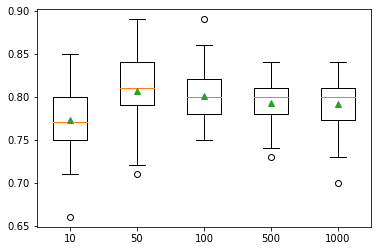

In [11]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section32"></a> 
## <font color="#004D7F"> 3.2. Profundida del árbol</font>

- Podemos hacer que los modelos utilizados en el conjunto sean menos débiles (más hábiles) aumentando la profundidad del árbol de decisión.
- Utilizar el argumento de `max depth` de `DecisionTreeClassifier`.
- El valor predeterminado es 1, aunque exploraremos valores del 1 al 10. 

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
</div>

In [12]:
from sklearn.tree import DecisionTreeClassifier

def get_models():
	models = dict()
	# explorar profundidad de 1 a 10
	for i in range(1,11):
		base = DecisionTreeClassifier(max_depth=i)
		models[str(i)] = AdaBoostClassifier(algorithm='SAMME', base_estimator=base)
	return models

In [13]:
X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.798 (0.034)
>2 0.853 (0.033)
>3 0.894 (0.035)
>4 0.914 (0.029)
>5 0.918 (0.032)
>6 0.931 (0.023)
>7 0.932 (0.025)
>8 0.934 (0.021)
>9 0.937 (0.023)
>10 0.934 (0.026)


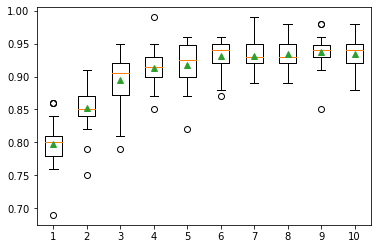

In [14]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section33"></a> 
## <font color="#004D7F"> 3.3. Tasa de aprendizaje</font>

- AdaBoost también admite una tasa de aprendizaje (a veces llamada _shrinkage_) que controla la contribución de cada modelo a la predicción del conjunto.
- Está controlado por el argumento `learning_rate` (por defecto 1,0 o contribución completa).
- Más árboles pueden requerir una tasa de aprendizaje menor; menos árboles pueden requerir una mayor tasa de aprendizaje.
- Es común utilizar valores entre 0 y 1 y, a veces, valores muy pequeños para evitar el sobreajuste, como 0,1, 0,01 o 0,001.

In [15]:
from numpy import arange

def get_models():
	models = dict()
	# tasa de aprendizaje de 0.1 a 2 con incrementos de 0.1
	rates = arange(0.1, 2.1, 0.1)
	for i in rates:
		key = '%.1f' % i
		models[key] = AdaBoostClassifier(learning_rate=i)
	return models

In [16]:
X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>0.1 0.767 (0.049)
>0.2 0.786 (0.042)
>0.3 0.802 (0.040)
>0.4 0.798 (0.037)
>0.5 0.805 (0.042)
>0.6 0.795 (0.031)
>0.7 0.799 (0.035)
>0.8 0.801 (0.033)
>0.9 0.805 (0.032)
>1.0 0.806 (0.041)
>1.1 0.801 (0.037)
>1.2 0.800 (0.030)
>1.3 0.799 (0.041)
>1.4 0.793 (0.041)
>1.5 0.790 (0.040)
>1.6 0.775 (0.034)
>1.7 0.767 (0.054)
>1.8 0.768 (0.040)
>1.9 0.736 (0.047)
>2.0 0.682 (0.048)


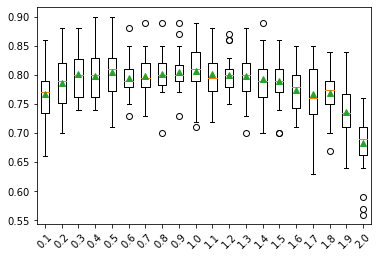

In [17]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section34"></a> 
## <font color="#004D7F"> 3.4. Algoritmo alternativo</font>

- Scikit-learn requiere que cualquier modelo utilizado también admita muestras ponderadas, ya que así es como se crea el conjunto ajustando modelos basados en una versión ponderada del conjunto de datos de entrenamiento.
- El modelo base se puede especificar mediante el argumento `estimator`.
- El modelo base también debe soportar la predicción de probabilidades o puntuaciones similares a las de probabilidad en el caso de la clasificación.
- Si el modelo especificado no admite un conjunto de datos de entrenamiento ponderado, verá el siguiente mensaje de error:
```text
    ValueError: KNeighborsClassifier doesn't support sample_weight.
```
Veamos un jemeplo con un clasificador débil `LogisticRegression`.

In [18]:
from sklearn.linear_model import LogisticRegression
X, y = get_dataset()
# definir el modelo
model = AdaBoostClassifier(algorithm='SAMME', base_estimator=LogisticRegression())
# evaluar el modelo
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.788 (0.038)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section4"></a> 
# <font color="#004D7F"> 4. Búsqueda de hiperparámetros</font>

- AdaBoost puede resultar difícil de configurar, ya que el algoritmo tiene muchos hiperparámetros clave que influyen directamente en el rendimiento del modelo
- Usaremos `GridSearchCV` para hacer una búsqueda controladsa de hiperparámentros.
- Buscaremos dos hiperparámetros clave para AdaBoost: la cantidad de árboles utilizados en el conjunto y la tasa de aprendizaje. 
- Cada combinación de configuración se evaluará mediante validación cruzada repetida de _k_ veces y las configuraciones se compararán utilizando accuracy medio.


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
</div>

In [19]:
from sklearn.model_selection import GridSearchCV

X, y = get_dataset()
# definir AdaBoost con hiperparámetros por defecto
model = AdaBoostClassifier(algorithm='SAMME')

# definir valores para n_stimators y learning_rate
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# definir el procedimiento de búsqueda y ejecutarlo en el dataset
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X, y)

print("Mejor combinación: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor combinación: 0.811667 usando {'learning_rate': 1.0, 'n_estimators': 500}


In [20]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) con: %r" % (mean, stdev, param))

0.646333 (0.036376) con: {'learning_rate': 0.0001, 'n_estimators': 10}
0.646333 (0.036376) con: {'learning_rate': 0.0001, 'n_estimators': 50}
0.646333 (0.036376) con: {'learning_rate': 0.0001, 'n_estimators': 100}
0.646667 (0.036545) con: {'learning_rate': 0.0001, 'n_estimators': 500}
0.646333 (0.036376) con: {'learning_rate': 0.001, 'n_estimators': 10}
0.646333 (0.036376) con: {'learning_rate': 0.001, 'n_estimators': 50}
0.645667 (0.036119) con: {'learning_rate': 0.001, 'n_estimators': 100}
0.651333 (0.039811) con: {'learning_rate': 0.001, 'n_estimators': 500}
0.644667 (0.036399) con: {'learning_rate': 0.01, 'n_estimators': 10}
0.651333 (0.039811) con: {'learning_rate': 0.01, 'n_estimators': 50}
0.683333 (0.053125) con: {'learning_rate': 0.01, 'n_estimators': 100}
0.751667 (0.049267) con: {'learning_rate': 0.01, 'n_estimators': 500}
0.709667 (0.054190) con: {'learning_rate': 0.1, 'n_estimators': 10}
0.753000 (0.050672) con: {'learning_rate': 0.1, 'n_estimators': 50}
0.764667 (0.047591

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---